In [ ]:
import os
import matplotlib.pyplot as plt
import cv2

In [ ]:
#unzipping file
!mkdir /content/brain_data
!unzip /content/brain_data.zip -d /content/brain_data


mkdir: cannot create directory ‘/content/brain_data’: File exists
Archive:  /content/brain_data.zip
 extracting: /content/brain_data/README.dataset.txt  
 extracting: /content/brain_data/README.roboflow.txt  
  inflating: /content/brain_data/data.yaml  
   creating: /content/brain_data/test/
   creating: /content/brain_data/test/images/
 extracting: /content/brain_data/test/images/G_31_SP__jpg.rf.c2acd31d894f8ed2c0c81c9180e7636b.jpg  
 extracting: /content/brain_data/test/images/G_32_BR__jpg.rf.303fb6c1cd513a465ff538f1b0897424.jpg  
 extracting: /content/brain_data/test/images/G_32_SP__jpg.rf.a8d447a99077ca755529971f090861da.jpg  
 extracting: /content/brain_data/test/images/G_34_BR__jpg.rf.f9a3009ae9e6134c930c80c4657c3eb1.jpg  
 extracting: /content/brain_data/test/images/G_35_RO__jpg.rf.fa8406150d4ef3924de7f89dc0f65991.jpg  
 extracting: /content/brain_data/test/images/G_36_SP__jpg.rf.5cb1161314429f63d5b870d87e84ad5c.jpg  
 extracting: /content/brain_data/test/images/G_37_BR__jpg.rf.

In [ ]:
data_dir = "/content/brain_data"
train_images_dir = data_dir + "/train/images"
train_labels_dir = data_dir + "/train/labels"
valid_images_dir = data_dir + "/valid/images"
valid_labels_dir = data_dir + "/valid/labels"

Samples from Train Set:


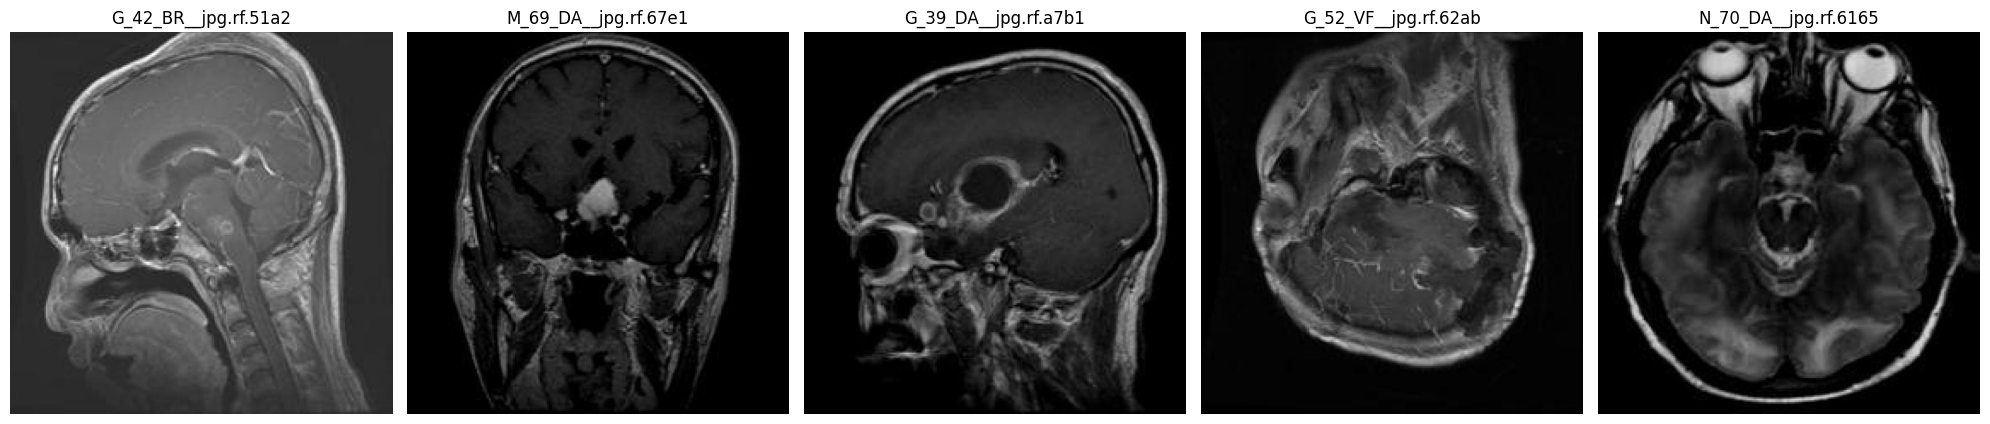

Samples from Validation Set:


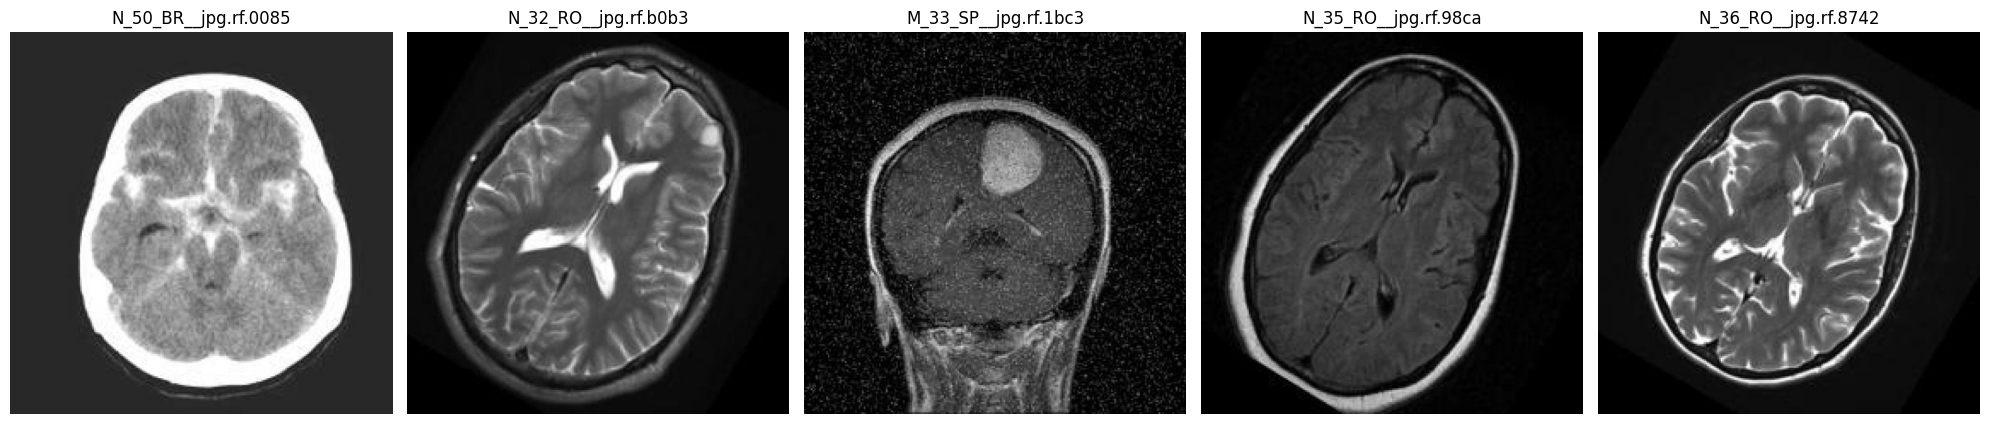

In [ ]:
#visualising the images in train and validation dataset
def show_images(image_folder,num_samples=5):

    sample_images = os.listdir(image_folder)[:num_samples]
    plt.figure(figsize=(20,10))

    for i, image_name in enumerate(sample_images):
        image_path = os.path.join(image_folder,image_name)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(image)
        plt.title(image_name[:20])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

#visualise images from train and valid
print("Samples from Train Set:")
show_images(train_images_dir)

print("Samples from Validation Set:")
show_images(valid_images_dir)

In [ ]:
#checking label consistency
def check_label_consistency(image_folder,label_folder):

    image_files = os.listdir(image_folder)
    label_files = os.listdir(label_folder)

#splitting the extension (.jp,.txt) and filename, and then only saving the filename as image and label names
    image_names = [filename.split('.')[0] for filename in image_files]
    label_names = [filename.split('.')[0] for filename in label_files]

    inconsistent_files = set(image_names) ^ set(label_names)

    if inconsistent_files:
        print("Inconsistent files found between images and labels:")
        print(inconsistent_files)
    else:
        print("Labels are consistent with images.")
# Check label consistency for train, valid sets
print("Checking label consistency for Train Set:")
check_label_consistency(train_images_dir, train_labels_dir)

print("Checking label consistency for Validation Set:")
check_label_consistency(valid_images_dir, valid_labels_dir)

Checking label consistency for Train Set:
Labels are consistent with images.
Checking label consistency for Validation Set:
Labels are consistent with images.


* Label consistency is essential in tasks like object detection because it ensures that each image in your dataset has a corresponding label or annotation file that accurately describes the objects present in the image.
* The ^ operator computes the symmetric difference between two sets, which contains elements that are present in either set but not in both sets.

In [ ]:
# Function to count classes and check class balance
def count_classes_and_balance(label_folder):
    label_files = os.listdir(label_folder)
    class_counts = {}

    # Count classes and their occurrences
    for label_file in label_files:
        with open(os.path.join(label_folder, label_file), 'r') as f:
            for line in f:
                class_label = line.strip().split()[0]  # Extract class label from each line
                class_counts[class_label] = class_counts.get(class_label, 0) + 1

    # Calculate class balance
    total_samples = sum(class_counts.values())
    class_balance = {class_label: count / total_samples for class_label, count in class_counts.items()}

    return class_counts, class_balance

class_counts, class_balance = count_classes_and_balance(train_labels_dir)

print("Class Counts:")
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} samples")

print("\nClass Balance:")
for class_label, balance in class_balance.items():
    print(f"Class {class_label}: {balance}")

Class Counts:
Class 0: 203 samples
Class 1: 192 samples
Class 3: 184 samples
Class 2: 191 samples

Class Balance:
Class 0: 0.2636363636363636
Class 1: 0.24935064935064935
Class 3: 0.23896103896103896
Class 2: 0.24805194805194805


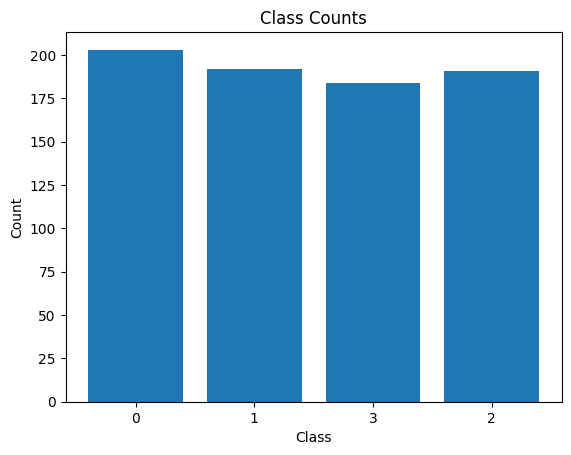

In [ ]:
# Visualize the class counts
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Counts')
plt.show()

##### The classes are almost balanced, hence we can move further.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/78.2 GB disk)


In [ ]:
#moving data.yaml to data folder in yolov5
!mv /content/brain_data/data.yaml /content/yolov5/data/


In [ ]:
#training
!python train.py --img 640 --batch 16 --epochs 200 --data data.yaml --weights yolov5s.pt --cache

2024-04-21 14:06:34.230735: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 14:06:34.230791: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 14:06:34.280214: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optim

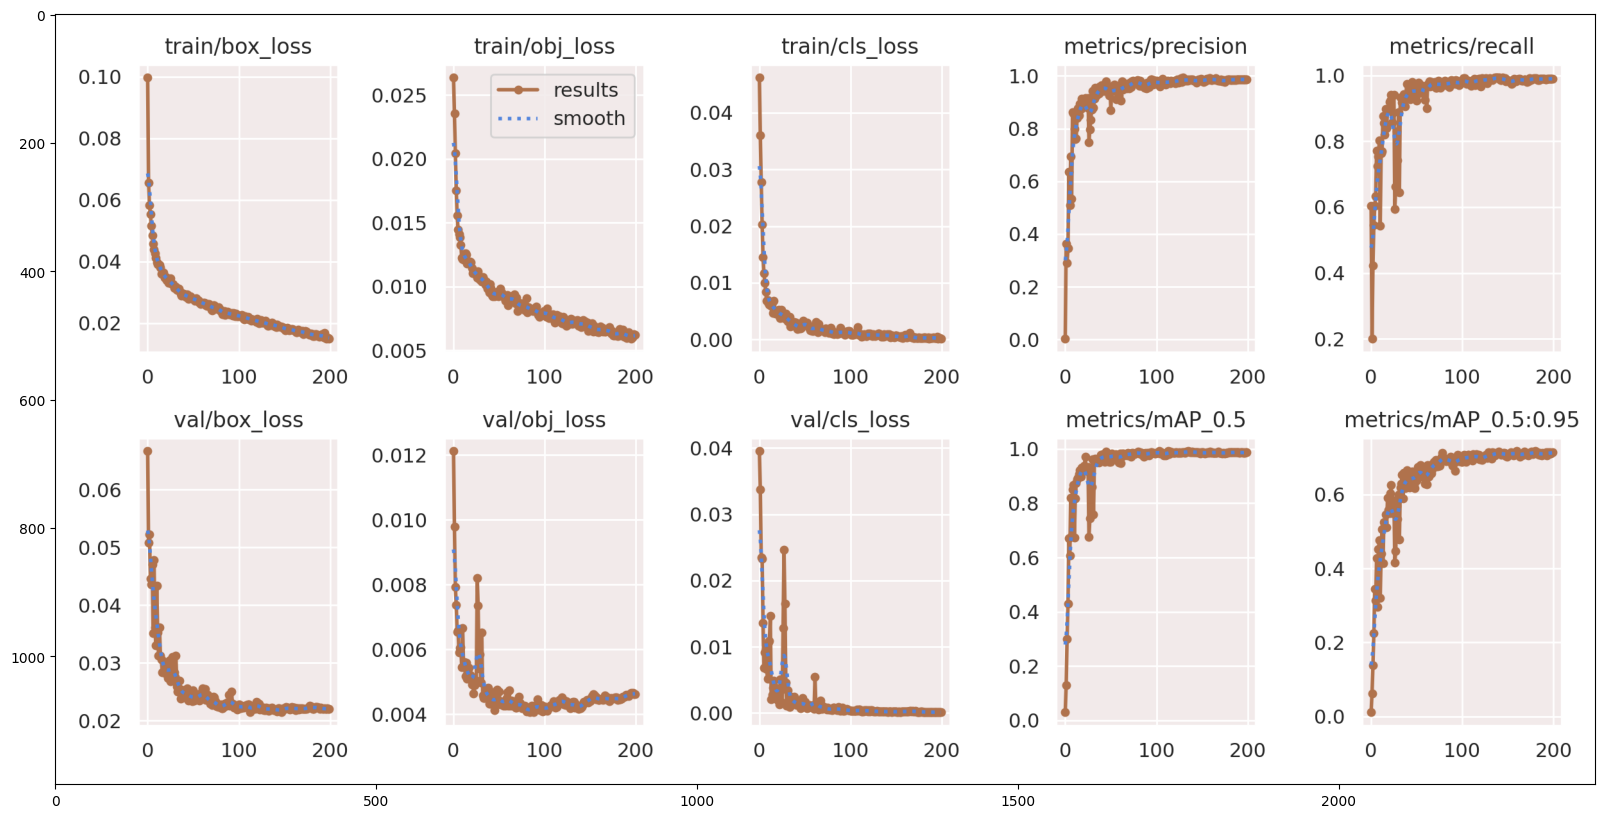

In [ ]:
plt.figure(figsize=(20, 10))
img = cv2.imread('/content/yolov5/runs/train/exp/results.png')
plt.imshow(img)
plt.show()

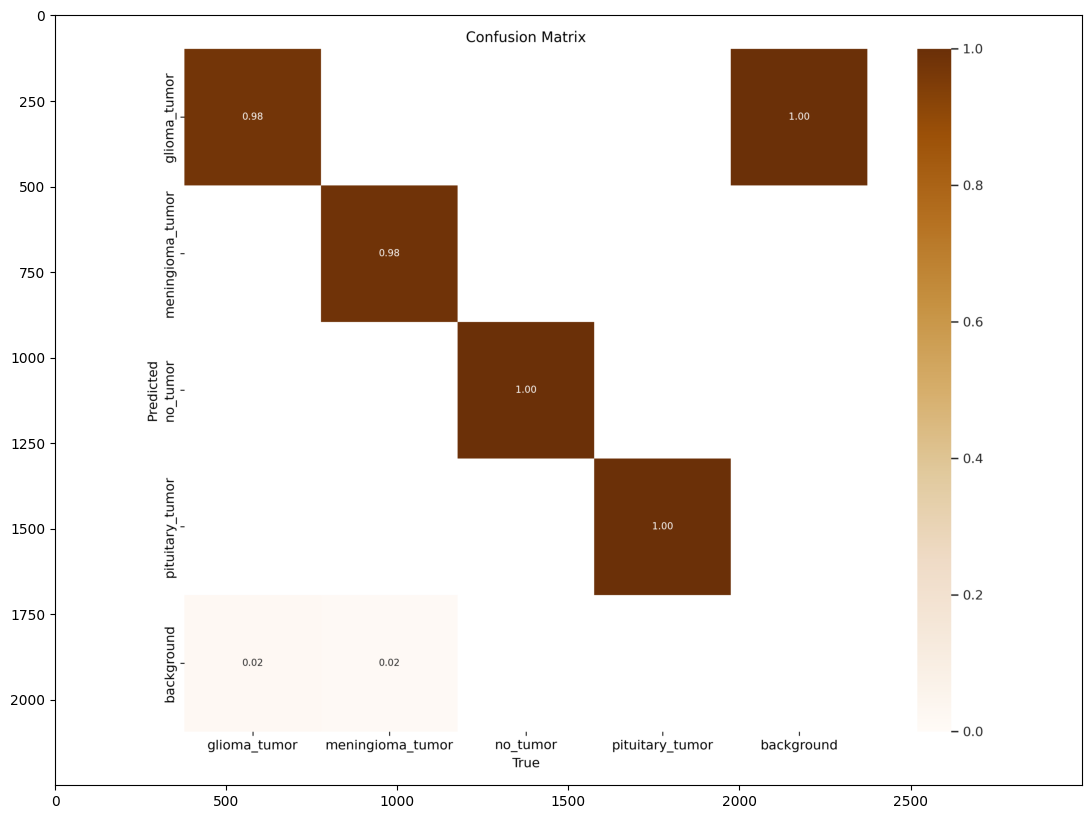

In [ ]:
plt.figure(figsize=(20, 10))
img = cv2.imread('/content/yolov5/runs/train/exp/confusion_matrix.png')
plt.imshow(img)
plt.show()

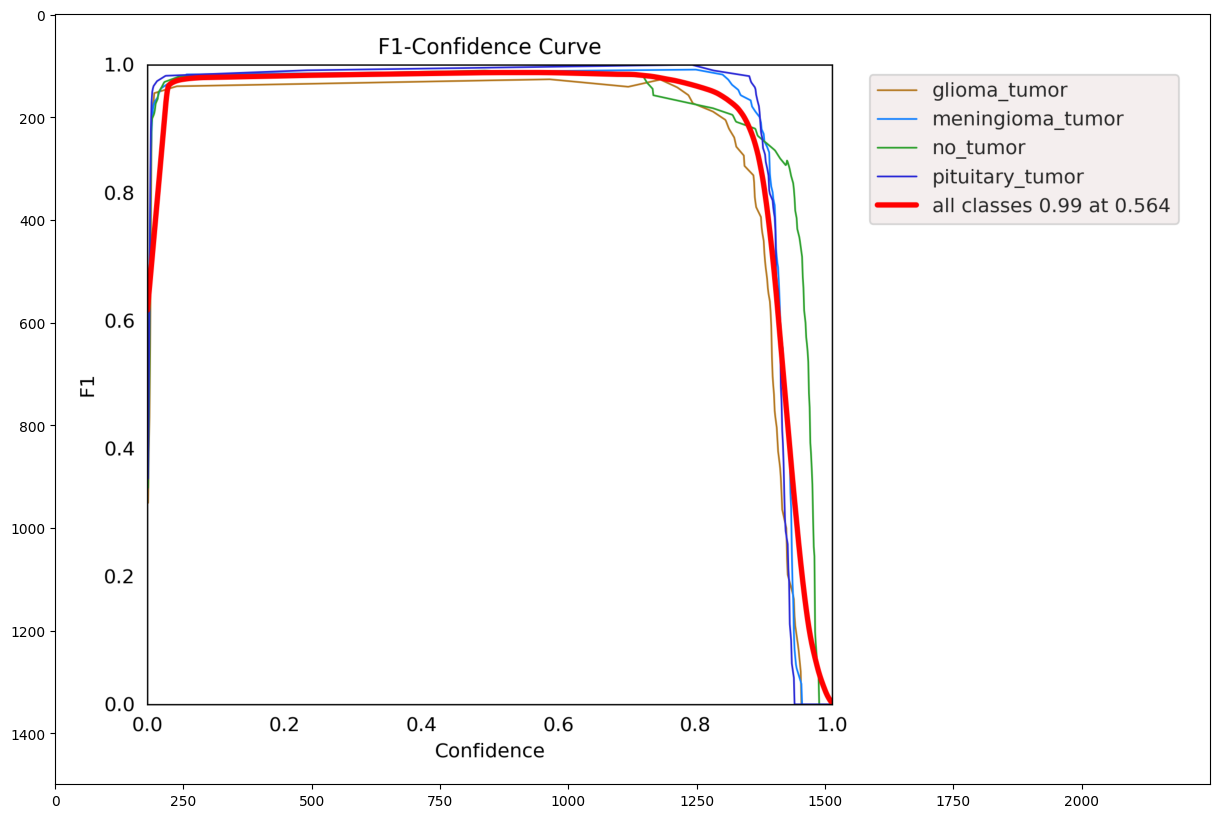

In [ ]:
plt.figure(figsize=(20, 10))
img = cv2.imread('/content/yolov5/runs/train/exp/F1_curve.png')
plt.imshow(img)
plt.show()

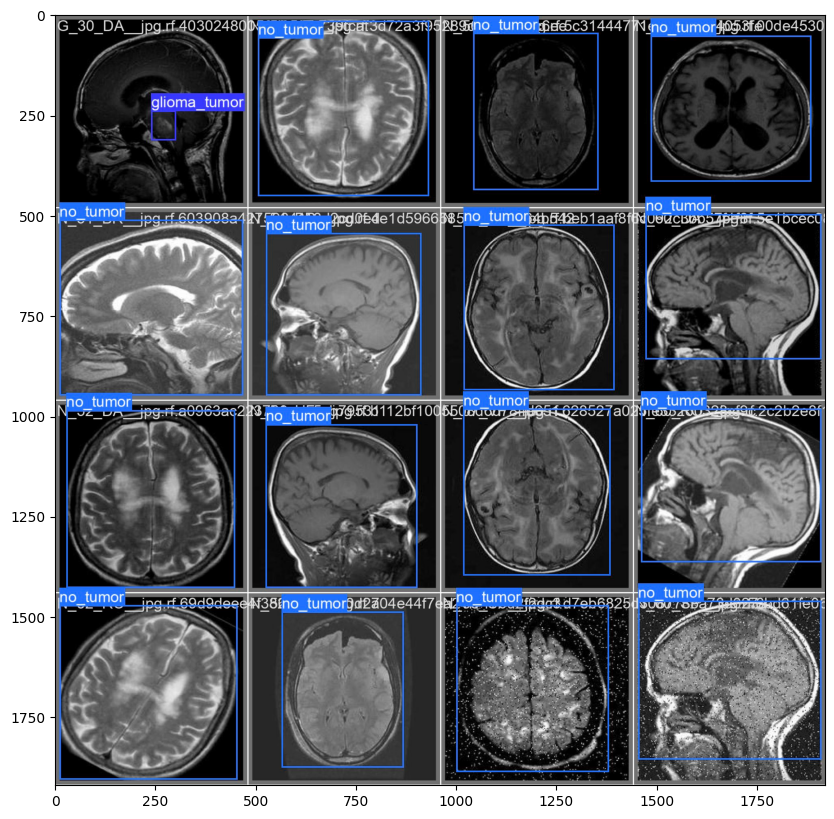

In [ ]:
plt.figure(figsize=(20, 10))
img = cv2.imread('/content/yolov5/runs/train/exp/val_batch0_labels.jpg')
plt.imshow(img)
plt.show()

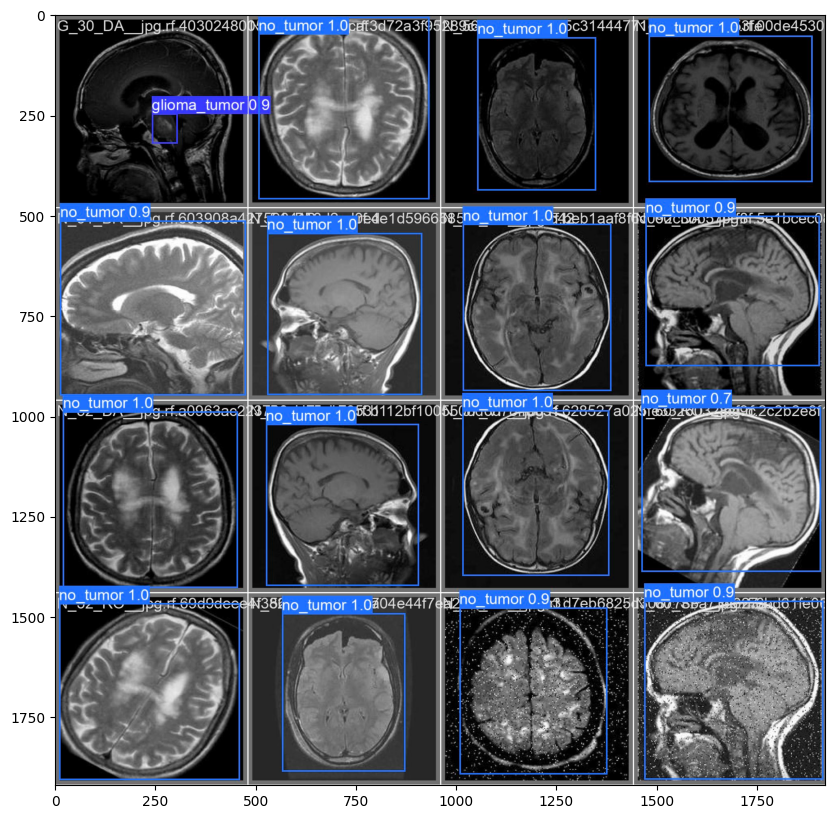

In [ ]:
plt.figure(figsize=(20, 10))
img = cv2.imread('/content/yolov5/runs/train/exp/val_batch0_pred.jpg')
plt.imshow(img)
plt.show()

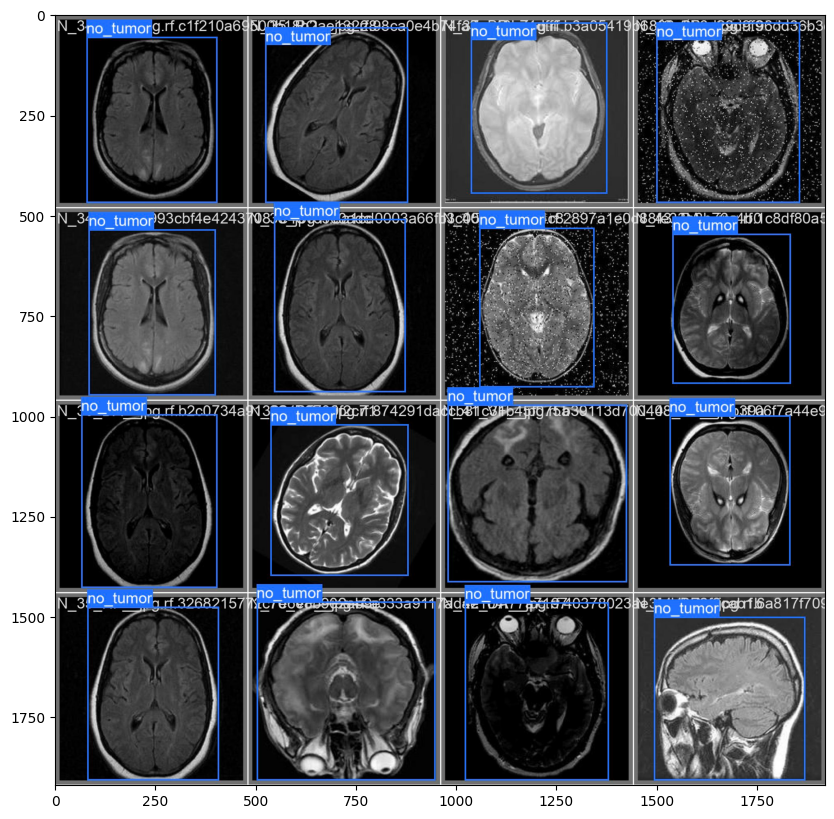

In [ ]:
plt.figure(figsize=(20, 10))
img = cv2.imread('/content/yolov5/runs/train/exp/val_batch1_labels.jpg')
plt.imshow(img)
plt.show()

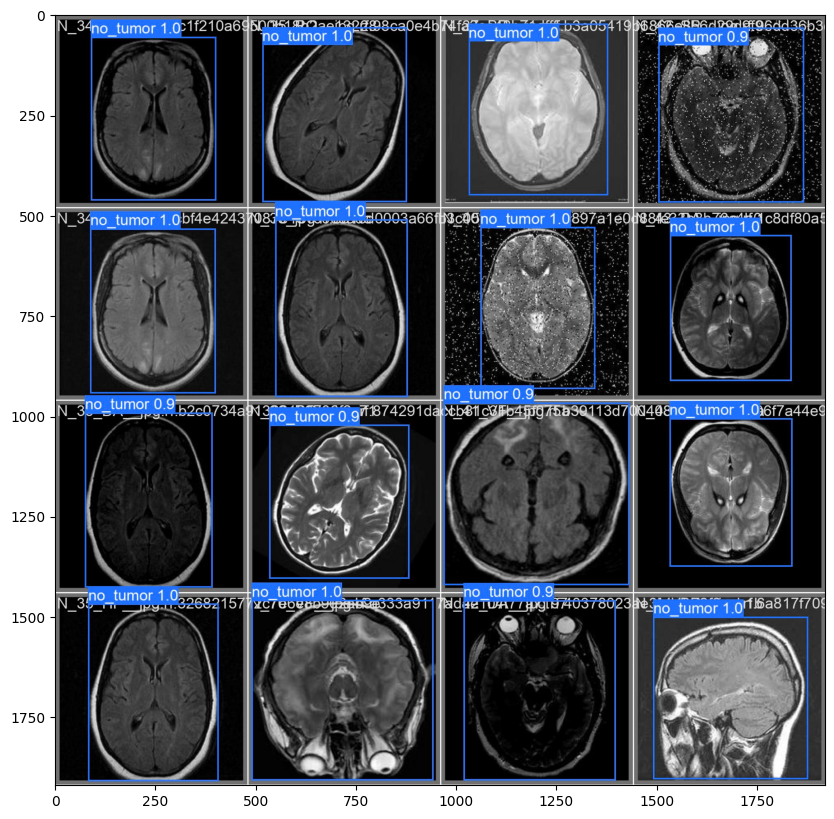

In [ ]:
plt.figure(figsize=(20, 10))
img = cv2.imread('/content/yolov5/runs/train/exp/val_batch1_pred.jpg')
plt.imshow(img)
plt.show()

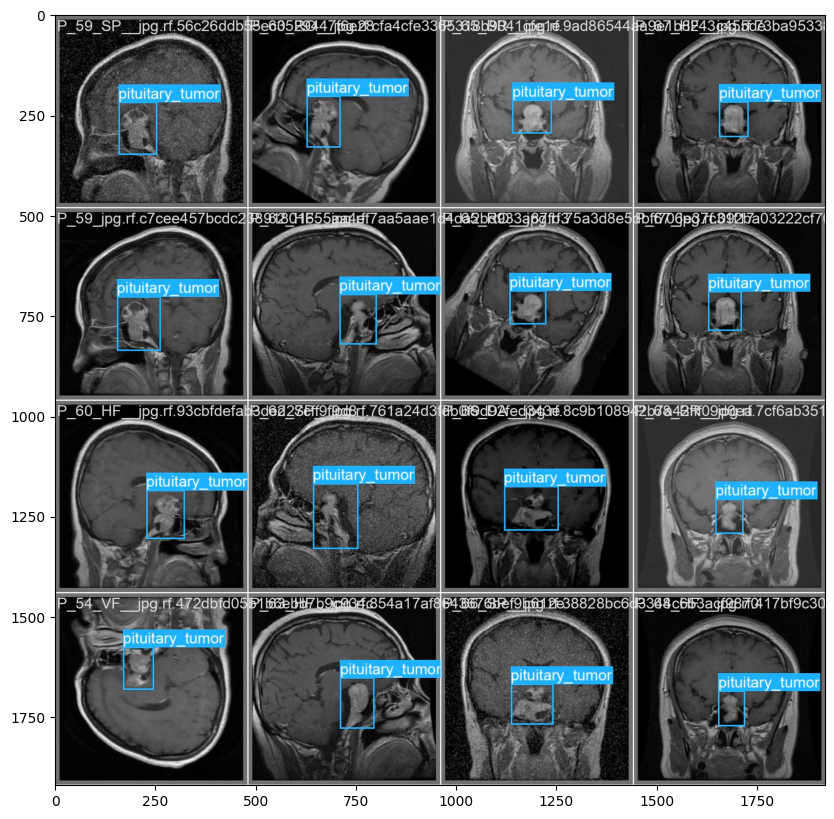

In [ ]:
plt.figure(figsize=(20, 10))
img = cv2.imread('/content/yolov5/runs/train/exp/val_batch2_labels.jpg')
plt.imshow(img)
plt.show()

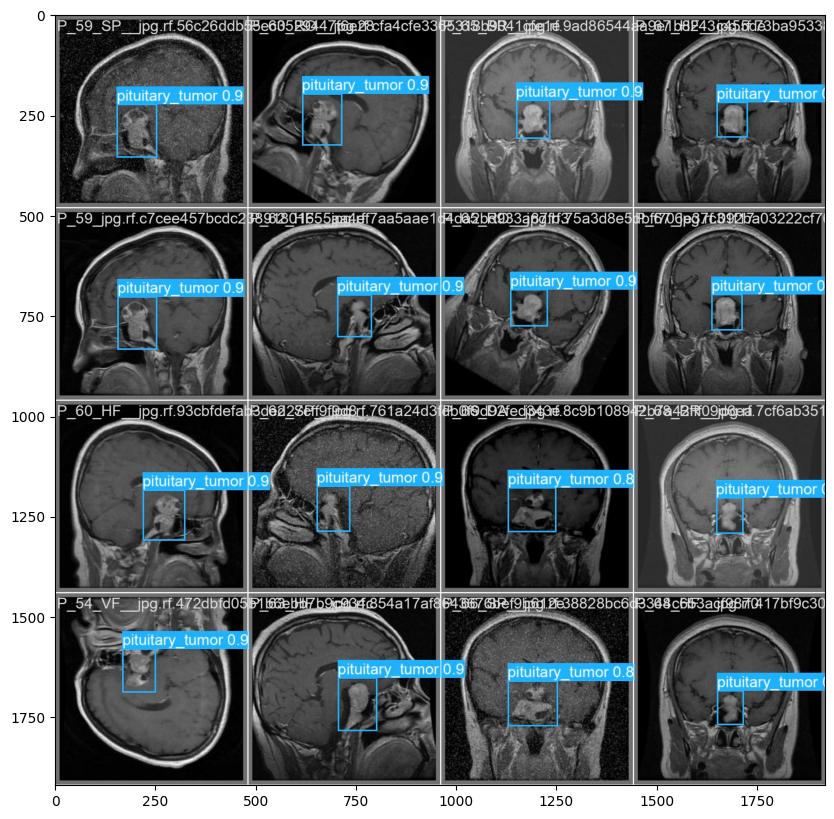

In [ ]:
plt.figure(figsize=(20, 10))
img = cv2.imread('/content/yolov5/runs/train/exp/val_batch2_pred.jpg')
plt.imshow(img)
plt.show()

In [ ]:
#testing
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /content/brain_data/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/brain_data/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/110 /content/brain_data/test/images/G_31_SP__jpg.rf.c2acd31d894f8ed2c0c81c9180e7636b.jpg: 640x640 1 glioma_tumor, 11.5ms
image 2/110 /content/brain_data/test/images/G_32_BR__jpg.rf.303fb6c1cd513a465ff538f1b0897424.jpg: 640x640 1 glioma_tumor, 11.6ms
image 3/110 /content/brain_data/test/images/G_32_SP__jpg.rf